# Loading libraries

In [1]:
import tensorflow as tf
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

sess = tf.InteractiveSession()

tf.set_random_seed(0)
np.random.seed(0)
rng = np.random.RandomState()

# Importing mnist dataset

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.reshape(x_train, [-1, 28*28])
x_test = np.reshape(x_test, [-1, 28*28])
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Validation data split

In [3]:
x_train, x_val = x_train[:55000], x_train[55000:]
y_train, y_val = y_train[:55000], y_train[55000:]

# Network Parameters

In [4]:
n_input        = 784 # 28x28 input image
n_hidden_1     = 256 # hidden layer num of features
n_hidden_2     = 128 # hidden layer num of features
n_hidden_3     = 64  # hidden layer num of features

# Training Parameters

In [5]:
learning_rate   = 0.001
training_epochs = 20
batch_size      = 100
display_step    = 1

# Xavier Initialization

In [6]:
def xavier_init(dim_in, dim_out, constant=4):
    init_range = constant*np.sqrt(6.0/(dim_in + dim_out)) 
    return tf.random_uniform([dim_in, dim_out], minval=-init_range, maxval=init_range, dtype=tf.float32)

# Initializing weights & biases

In [7]:
#weights = {
#    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
#    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
#    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
#    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input]))
#}
#biases = {
#    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
#    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
#    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
#    'decoder_b2': tf.Variable(tf.random_normal([n_input]))
#}
weights = {
    'encoder_h1': tf.Variable(xavier_init(n_input, n_hidden_1)),
    'encoder_h2': tf.Variable(xavier_init(n_hidden_1, n_hidden_2)),
    'decoder_h1': tf.Variable(xavier_init(n_hidden_2, n_hidden_1)),
    'decoder_h2': tf.Variable(xavier_init(n_hidden_1, n_input))
}
biases = {
    'encoder_b1': tf.Variable(tf.zeros([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.zeros([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.zeros([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.zeros([n_input]))
}

# Creating Encoder

In [8]:
def encoder(x, activ_fnc=tf.nn.sigmoid):
    layer_1 = activ_fnc( tf.add( tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']) )        # hidden layer 1
    layer_2 = activ_fnc( tf.add( tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']) )  # hidden layer 2
    out = layer_2
    return out

# Creating Decoder

In [9]:
def decoder(x, activ_fnc=tf.nn.sigmoid):
    layer_1 = activ_fnc( tf.add( tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']) )        # hidden layer 1
    layer_2 = activ_fnc( tf.add( tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']) )  # hidden layer 2
    out = layer_2
    return out

# Initializing Model

In [10]:
x_plh = tf.placeholder("float", [None, n_input])

In [11]:
enc_model = encoder(x_plh)
dec_model = decoder(enc_model)

In [12]:
y_pred = dec_model
y_gt   = x_plh

## Defining loss-function & optimizer

In [13]:
cross_entropy = y_gt*tf.log(y_pred+1e-10) + (1.0-y_gt)*tf.log(1.0-y_pred+1e-10)
x_error       =  -1 * tf.reduce_mean(tf.reduce_sum(cross_entropy,1))

In [14]:
sq_error = tf.reduce_mean(tf.pow(y_gt-y_pred,2))

In [15]:
#optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(sq_error)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(x_error)

# Initializing the variables

In [16]:
init = tf.global_variables_initializer()
sess.run(init)

In [17]:
def batch_indices(batch_nb, data_length, batch_size):
  # Batch start and end index
  start = int(batch_nb * batch_size)
  end = int((batch_nb + 1) * batch_size)
  # When there are not enough inputs left, we reuse some to complete the batch
  if end > data_length:
    shift = end - data_length
    start -= shift
    end -= shift
  return start, end

## Training

Epoch: 0001 , training loss= 105.6633606 , validation loss= 105.8616028
Epoch: 0002 , training loss= 83.2071075 , validation loss= 83.6015015
Epoch: 0003 , training loss= 74.3728256 , validation loss= 74.9453430
Epoch: 0004 , training loss= 69.4169312 , validation loss= 70.1362534
Epoch: 0005 , training loss= 66.1908569 , validation loss= 66.9895630
Epoch: 0006 , training loss= 64.0694580 , validation loss= 64.9576874
Epoch: 0007 , training loss= 62.3043709 , validation loss= 63.2152634
Epoch: 0008 , training loss= 60.8911362 , validation loss= 61.8381195
Epoch: 0009 , training loss= 60.0359650 , validation loss= 60.9896545
Epoch: 0010 , training loss= 58.9559784 , validation loss= 59.9430504
Epoch: 0011 , training loss= 58.2685242 , validation loss= 59.2543831
Epoch: 0012 , training loss= 57.7953186 , validation loss= 58.7806740
Epoch: 0013 , training loss= 57.2215004 , validation loss= 58.2026253
Epoch: 0014 , training loss= 56.7563324 , validation loss= 57.7375374
Epoch: 0015 , trai

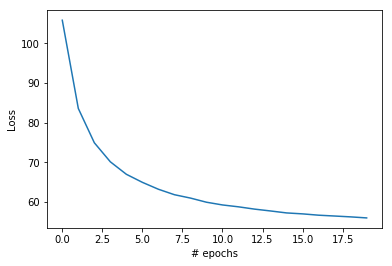

In [18]:
train_errors = []
valid_errors = []
for epoch in range(training_epochs):
    nb_batches = int(math.ceil(float(len(x_train)) / batch_size))
    assert nb_batches * batch_size >= len(x_train)

    # Indices to re-shuffle training set for every epoch
    index_shuf = list(range(len(x_train)))
    rng.shuffle(index_shuf)

    # Loop over all batches
    for batch in range(nb_batches):
        start, end = batch_indices(batch, len(x_train), batch_size)
        sess.run(optimizer, feed_dict={x_plh: x_train[index_shuf[start:end]]})
      
    train_loss = sess.run(x_error, feed_dict={x_plh: x_train})
    validation_loss = sess.run(x_error, feed_dict={x_plh: x_val})
    train_errors.append(train_loss)
    valid_errors.append(validation_loss)
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch + 1), ", training loss=", "{:.7f}".format(train_loss), ", validation loss=",
              "{:.7f}".format(validation_loss))

print("Training finished!")
plt.plot(valid_errors)
plt.xlabel("# epochs")
plt.ylabel("Loss")

In [19]:
test_loss = sess.run(x_error, feed_dict={x_plh: x_test})
print("Test loss: ", "{:.7f}".format(test_loss))

Test loss:  55.0703201


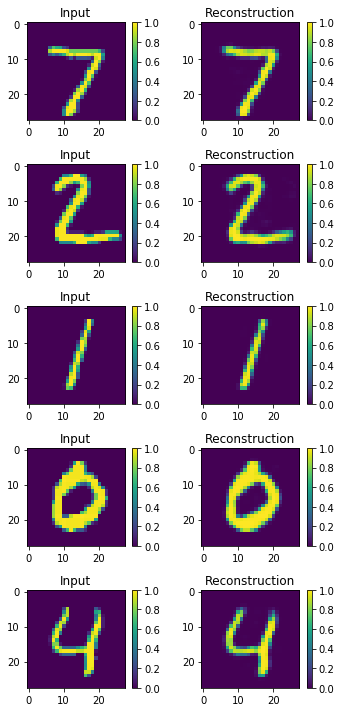

In [21]:
noSamples=5
xsample = x_test[:noSamples]
xreconst = sess.run(y_pred, feed_dict={x_plh: xsample})

fig = plt.figure(figsize=(5, noSamples*2))
for ii in range(noSamples):
    plt.subplot(noSamples, 2, 2*ii + 1)
    plt.title("Input")
    plt.imshow(np.reshape(xsample[ii], (28,28)), vmin=0, vmax=1)
    plt.colorbar()
    
    plt.subplot(noSamples, 2, 2*ii + 2)
    plt.title("Reconstruction")
    plt.imshow(np.reshape(xreconst[ii], (28,28)), vmin=0, vmax=1)
    plt.colorbar()

plt.tight_layout()
fig.savefig('out_crossError_xavierInit.png', bbox_inches='tight')